# Part3
---
* first part is my best attempt
* second part is using tools
    * so much shorter
    
Part 3 was a little harder than the others. I start with the original images, and turn them to black a white. Because the second image is so much much bigger, I shrunk the size down. This gave me better results than using the large second image. I then call the openCV SIFT function to get my keypoints for both images. On my first go, I use my keypoints fom image one to find the nearest neighbor on my points from image two. I then sort the list of nearest neightbors in order of smallest to lrgest distances. Then I take the top 10% and draw lines from one point to the other. It seems like a lot of the points are very close.

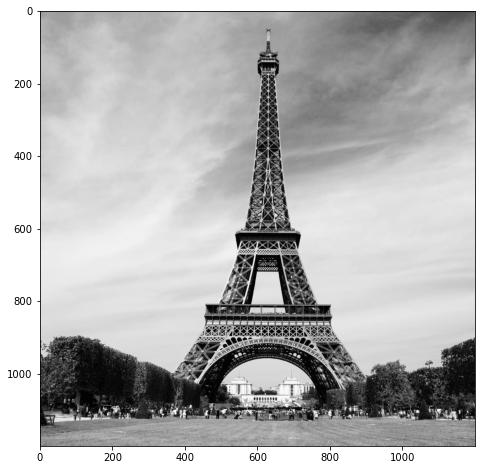

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread('SIFT1_img.jpg')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.figure(figsize=(10,8))
plt.imshow(gray,cmap = "gray")
plt.show()

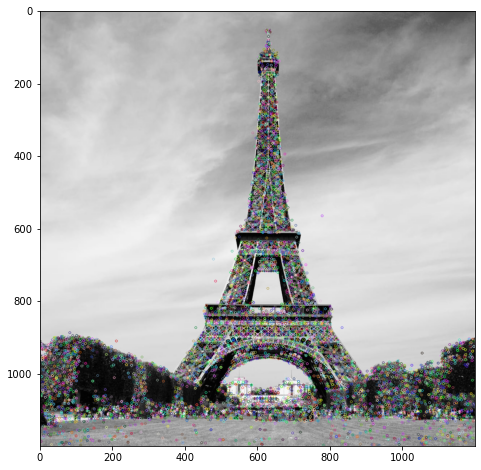

In [2]:
sift = cv.SIFT_create()
kp = sift.detect(gray,None)
img1=cv.drawKeypoints(gray,kp,img)


# https://stackoverflow.com/questions/35884409/how-to-extract-x-y-coordinates-from-opencv-cv2-keypoint-object
pts1 = cv.KeyPoint_convert(kp)
pts1 = np.unique(pts1,axis=0)
plt.figure(figsize=(10,8))
plt.imshow(img1,cmap = "gray")
plt.show()

### image 2

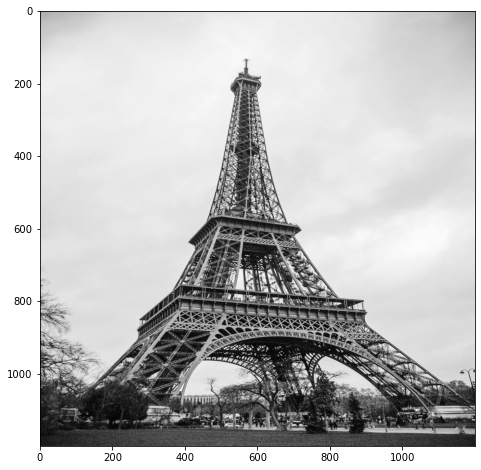

In [3]:
img = cv.imread('SIFT2_img.jpg')
dim = (img1.shape[0],img1.shape[1])

img = cv.resize(img,dim, interpolation = cv.INTER_AREA)
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.figure(figsize=(10,8))
plt.imshow(gray,cmap = "gray")
plt.show()

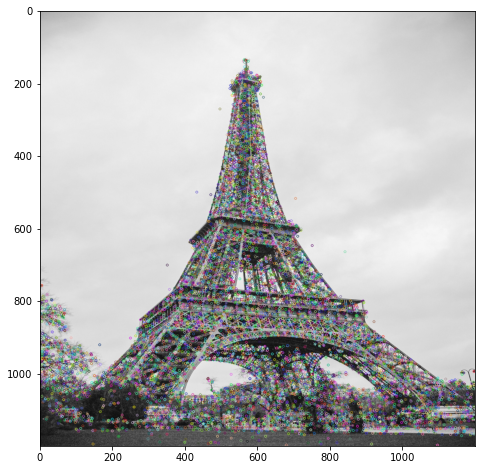

In [4]:
sift = cv.SIFT_create()
kp = sift.detect(gray,None)
img2=cv.drawKeypoints(gray,kp,img)


# https://stackoverflow.com/questions/35884409/how-to-extract-x-y-coordinates-from-opencv-cv2-keypoint-object
pts2 = cv.KeyPoint_convert(kp)
pts2 = np.unique(pts2,axis=0)
plt.figure(figsize=(10,8))
plt.imshow(img2,cmap = "gray")
plt.show()

## Nearest Neighbor

In [5]:
I1 = np.array([0,0,0])
#print(pts1)
for i,t in enumerate(pts1):
    dist = (t - pts2)**2
    dist = np.sum(dist, axis=1)
    dist = np.sqrt(dist)
    I1 =  np.vstack((I1,[i,np.argmin(dist),np.amin(dist)]))
I1=I1[1:]


### check matches l1

In [6]:
I1 = I1[np.argsort(I1[:, 2])]


In [7]:
I2 = np.array([0,0,0])
#print(pts1)
for i,t in enumerate(pts2):
    dist = (t - pts1)**2
    dist = np.sum(dist, axis=1)
    dist = np.sqrt(dist)
    I2 =  np.vstack((I2,[i,np.argmin(dist),np.amin(dist)]))
I2=I2[1:]


### check matches l2

In [8]:
I2 = I2[np.argsort(I2[:, 2])]

lines

* [drawing lines](https://stackoverflow.com/questions/7589012/combining-two-images-with-opencv)

<ipython-input-9-0d3272ea5dc4>:15: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  h_img = cv.line(h_img, tuple(pts1[int(I1[xx,0])]), tuple(pts2[int(I1[xx,1])]),colors,1)


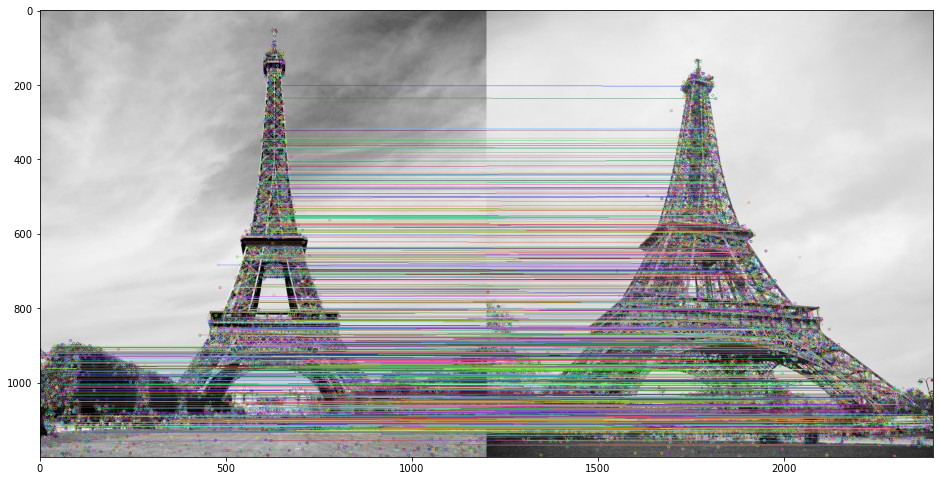

In [9]:

m1 = np.zeros((img1.shape[0],img2.shape[1],3))
m2 = np.zeros((img2.shape[0]-img1.shape[0],img1.shape[1],3))

pts2[:,0] =  pts2[:,0] + img1.shape[0]
#pts2[:,1] =  pts2[:,1] + img1.shape[1]

#h_img1 = np.concatenate((m2, img2),axis=1)
#h_img2 = np.concatenate((img1,m2),axis=0)
#plt.imshow(h_img2)
#plt.show()
h_img = np.concatenate((img1,img2),axis = 1).astype(np.uint8)

for xx in range(int(len(pts2[:,1])*.1)):
    colors = np.random.random(size=3) * 256
    h_img = cv.line(h_img, tuple(pts1[int(I1[xx,0])]), tuple(pts2[int(I1[xx,1])]),colors,1)
plt.figure(figsize=(16,12))
plt.imshow(h_img,cmap="gray")
plt.show()

# directly using the tools
* [open cv docs](https://docs.opencv.org/master/dc/dc3/tutorial_py_matcher.html)

This was my second attempt. I wasn't happy with my original results. I didn't like that I had to shrink image2 down. So instead, I retried this assignment directly using the premade openCV tools. Obviously, this worked way better. The matcher was a lot faster, though I notice there are still some errors even in the top 10%. I assume that a lot of these bad matches could be filtered out. I did explicitely use the l2 norm in my mather as told in the instructions, though I assume I could use something better to get better results.

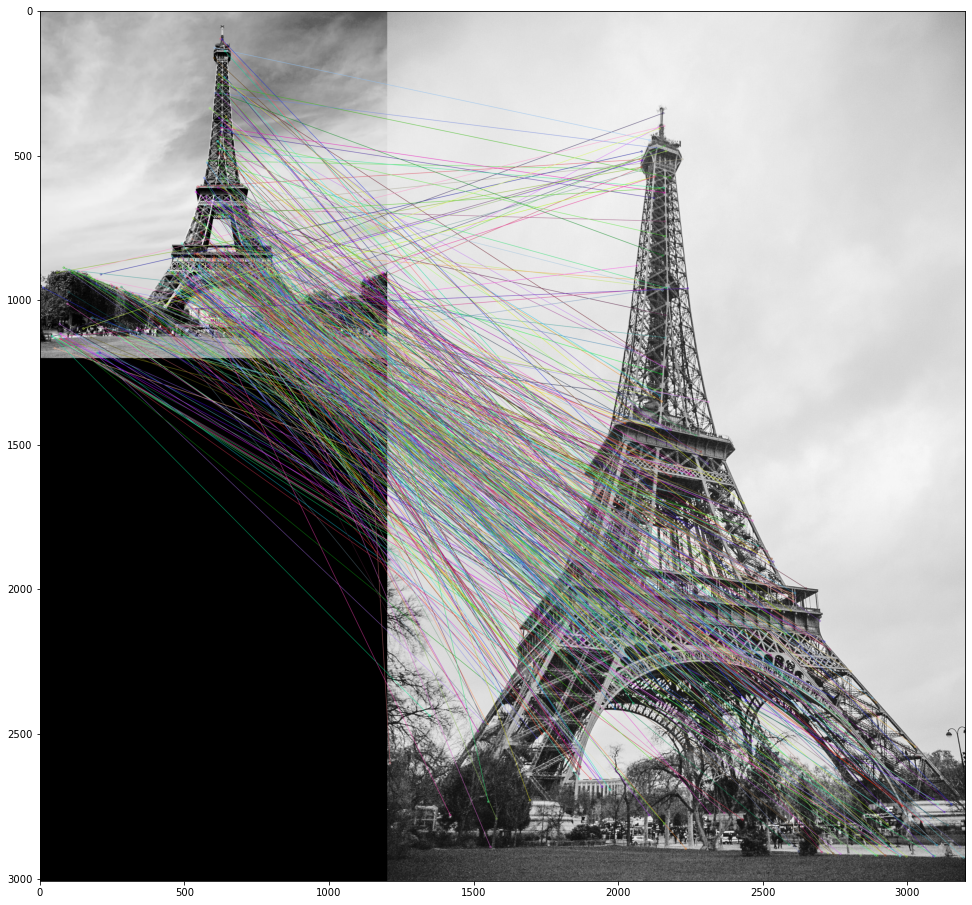

In [10]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('SIFT1_img.jpg',cv.IMREAD_GRAYSCALE)
img2 = cv.imread('SIFT2_img.jpg',cv.IMREAD_GRAYSCALE)

sift = cv.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

bf = cv.BFMatcher(cv.NORM_L2)
matchList = bf.match(des1,des2)

matchList = sorted(matchList, key = lambda x:x.distance)

img3 = cv.drawMatches(img1,kp1,img2,kp2,matchList[:(len(matchList)//10)],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(20,16))
plt.imshow(img3)
plt.show()